In [1]:
import xarray as xr
import numpy as np
from os.path import join
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [2]:
DATA_DIR = "./data"

In [9]:
plt.rcParams['figure.figsize'] = [25, 8]  # general matplotlib parameters

In [4]:
order5_data_fn = 'compress.isosph5.CESM2.historical.r1i1p1f1.Input.Exp8_fixed.nc'
order6_data_fn = 'compress.isosph.CESM2.historical.r1i1p1f1.Input.Exp8_fixed.nc'
order5_data_fn = xr.open_dataset(join(DATA_DIR, order5_data_fn))
order6_data_fn = xr.open_dataset(join(DATA_DIR, order6_data_fn))

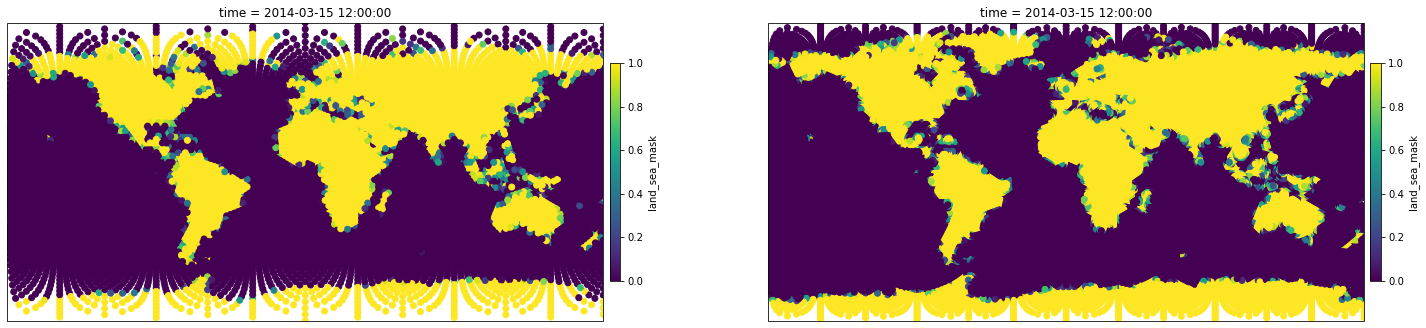

In [10]:
scatter_kwargs = dict(
    x='lon', y='lat', 
    subplot_kws={'projection':  ccrs.PlateCarree()},
    cbar_kwargs={
        'shrink': 0.5,  # make cbar smaller/larger
        'pad': 0.01,  # padding between right-ost subplot and cbar
        'fraction': 0.05}
)
fig, axs = plt.subplots(1, 2, subplot_kw={'projection': ccrs.PlateCarree()})
order5_data_fn.isel(time=-10).plot.scatter(**scatter_kwargs, hue='lsMask', ax=axs[0])
order6_data_fn.isel(time=-10).plot.scatter(**scatter_kwargs, hue='lsMask', ax=axs[1])

In [13]:
def add_clusters(ds, n_clusters = 2):
    ncells = ds.sizes['ncells']
    # assert ncells % n_clusters == 0, f'{ncells} vs {n_clusters}'
    rpt = int(ncells / n_clusters) + 1
    ds['random_clusters1'] = ('ncells', np.arange(n_clusters).repeat(rpt)[:ncells])

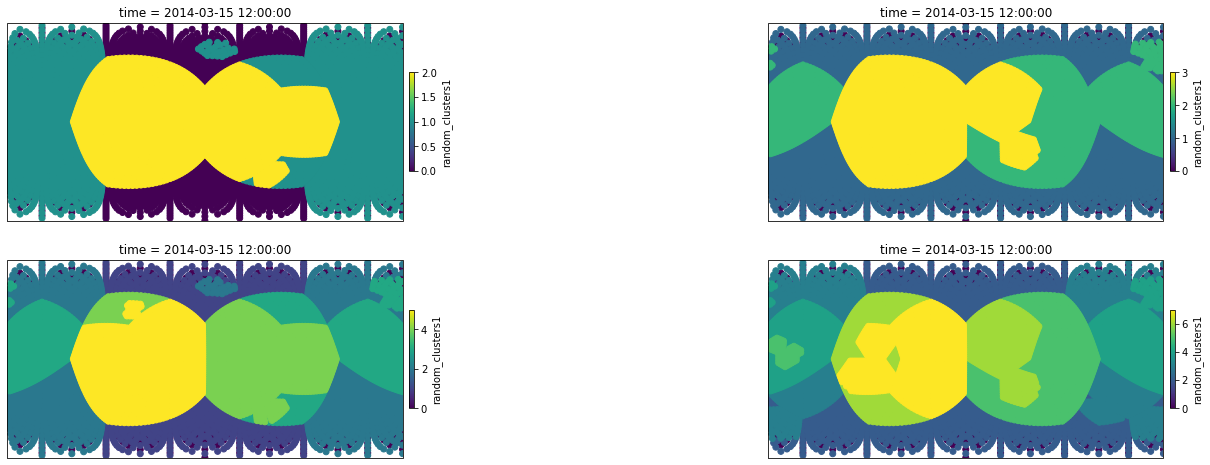

In [14]:
fig, axs = plt.subplots(2, 2, subplot_kw={'projection': ccrs.PlateCarree()})
axs=axs.flat
for i, nc in enumerate([3, 4, 6, 8]):
    add_clusters(order5_data_fn, n_clusters=nc)
    order5_data_fn.isel(time=-10).plot.scatter(**scatter_kwargs, hue='random_clusters1', ax=axs[i])